<a href="https://colab.research.google.com/github/merrymira/UPASS_ML_WEEK5/blob/main/UPASS_ML_WEEK5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Exercise

Features Engineering for Linear Regression Model

Reference:
https://www.kaggle.com/code/klmsathishkumar/shipping-cost-prediction/notebook

Training dataset:
https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK4/main/train.csv

Testing dataset:
https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK4/main/test.csv

We will use features engineering technique to improve the predicting performance of shipping cost from linear regression model.

The steps are:

1. Load Explore and Prepare Dataset
2. Feature Selection

*   Missing Values
*   Information Gain
*   Correlation Coefficient
*   Forward Feature Selection
*   Recursive Feature Elimination
*   Variable Transformations
*   Scaling
*   Feature Creation in ML   
    
3. Modelling and Analyze the performance

##1. Load Explore and Prepare Dataset

**[1.1]** Import the pandas and numpy packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**[1.2]** Create a variable called file_url containing the link to the CSV file

In [2]:
file_url = "https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK4/main/train.csv"

**[1.3]** Load the data into a DataFrame called df

In [3]:
org_train = pd.read_csv(file_url, index_col=0)
df_train = pd.read_csv(file_url, index_col=0)

**[1.4]** Display the first 5 rows of df

In [4]:
df_train.head()

,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
Customer Id,,,,,,,,,,,,,,,,,,,
fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


**[1.5]** Display the summary (info) of df

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, fffe3900350033003300 to fffe3700310031003600
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Artist Name            6500 non-null   object 
 1   Artist Reputation      5750 non-null   float64
 2   Height                 6125 non-null   float64
 3   Width                  5916 non-null   float64
 4   Weight                 5913 non-null   float64
 5   Material               5736 non-null   object 
 6   Price Of Sculpture     6500 non-null   float64
 7   Base Shipping Price    6500 non-null   float64
 8   International          6500 non-null   object 
 9   Express Shipment       6500 non-null   object 
 10  Installation Included  6500 non-null   object 
 11  Transport              5108 non-null   object 
 12  Fragile                6500 non-null   object 
 13  Customer Information   6500 non-null   object 
 14  Remote Location        572

**[1.6]** Check null values

In [6]:
df_train.isnull().sum()

Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [7]:
# prompt: seperate categorical column and numerical

cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()
num_cols = df_train.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns with missing values:")
print(df_train[cat_cols].columns[df_train[cat_cols].isnull().any()])

print("\nNumerical columns with missing values:")
print(df_train[num_cols].columns[df_train[num_cols].isnull().any()])

Categorical columns with missing values:
Index(['Material', 'Transport', 'Remote Location'], dtype='object')

Numerical columns with missing values:
Index(['Artist Reputation', 'Height', 'Width', 'Weight'], dtype='object')


# Features Selection
##**[2.1]** Filter Methods: Missing Values


In [8]:
# prompt: check percentage of null value for each features

missing_pct = df_train.isnull().sum() * 100 / len(df_train)
print("Percentage of missing values in each column:")
print(missing_pct)


Percentage of missing values in each column:
Artist Name               0.000000
Artist Reputation        11.538462
Height                    5.769231
Width                     8.984615
Weight                    9.030769
Material                 11.753846
Price Of Sculpture        0.000000
Base Shipping Price       0.000000
International             0.000000
Express Shipment          0.000000
Installation Included     0.000000
Transport                21.415385
Fragile                   0.000000
Customer Information      0.000000
Remote Location          11.861538
Scheduled Date            0.000000
Delivery Date             0.000000
Customer Location         0.000000
Cost                      0.000000
dtype: float64


In [9]:
for col in cat_cols:
  if col in df_train.columns:
    df_train[col] = df_train[col].fillna(df_train[col].mode())

In [10]:
for col in num_cols:
  if col in df_train.columns:
    df_train[col] = df_train[col].fillna(df_train[col].mean())

##**[2.2]** Filter Methods: Information Gain

In [11]:
# prompt: X_train[cat_cols] transform label encodeing concat to x_train drop X_train[cat_cols] columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
  if col in df_train.columns:
    df_train[col] = le.fit_transform(df_train[col])

In [12]:
df_train.head()

,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
Customer Id,,,,,,,,,,,,,,,,,,,
fffe3900350033003300,570,0.26,17.0,6.000000,4128.000000,1,13.91,16.27,1,1,0,0,0,1,0,768,749,3847,-283.29
fffe3800330031003900,2744,0.28,3.0,3.000000,61.000000,1,6.83,15.00,0,0,0,1,0,1,0,317,308,3842,-159.96
fffe3600370035003100,3662,0.07,8.0,5.000000,237.000000,3,4.96,21.18,0,0,0,1,1,1,1,328,321,524,-154.29
fffe350031003300,5155,0.12,9.0,9.617647,400694.821918,0,5.81,16.31,0,0,0,3,0,0,1,700,680,1566,-161.16
fffe3900320038003400,5325,0.15,17.0,6.000000,324.000000,0,3.18,11.94,1,1,1,0,0,1,0,1606,1597,404,-159.23


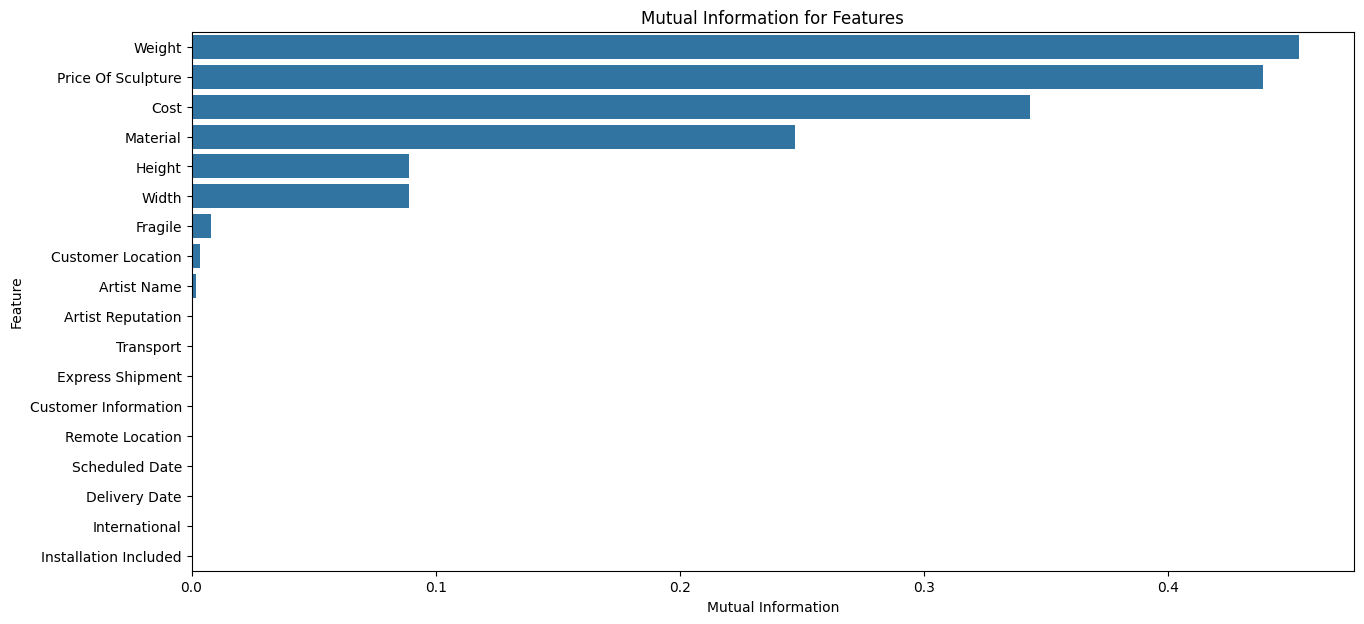

In [13]:
# prompt: information gain for each feature and plot bar chart

from sklearn.feature_selection import mutual_info_regression

X_train = df_train.drop('Base Shipping Price', axis=1)
y_train = df_train['Base Shipping Price']

mutual_info = mutual_info_regression(X_train, y_train)

# Create a dataframe with the features and their corresponding mutual information scores
mi_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Information': mutual_info})

# Sort the dataframe by mutual information in descending order
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 7))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
plt.title('Mutual Information for Features')
plt.show()


In [14]:
mi_df

,Feature,Mutual Information
4,Weight,0.453517
6,Price Of Sculpture,0.438785
17,Cost,0.343639
5,Material,0.247246
2,Height,0.089249
3,Width,0.089001
11,Fragile,0.007774
16,Customer Location,0.003672
0,Artist Name,0.001831
1,Artist Reputation,0.000000


##**[2.3]** Filter Methods: Correlation Coefficient

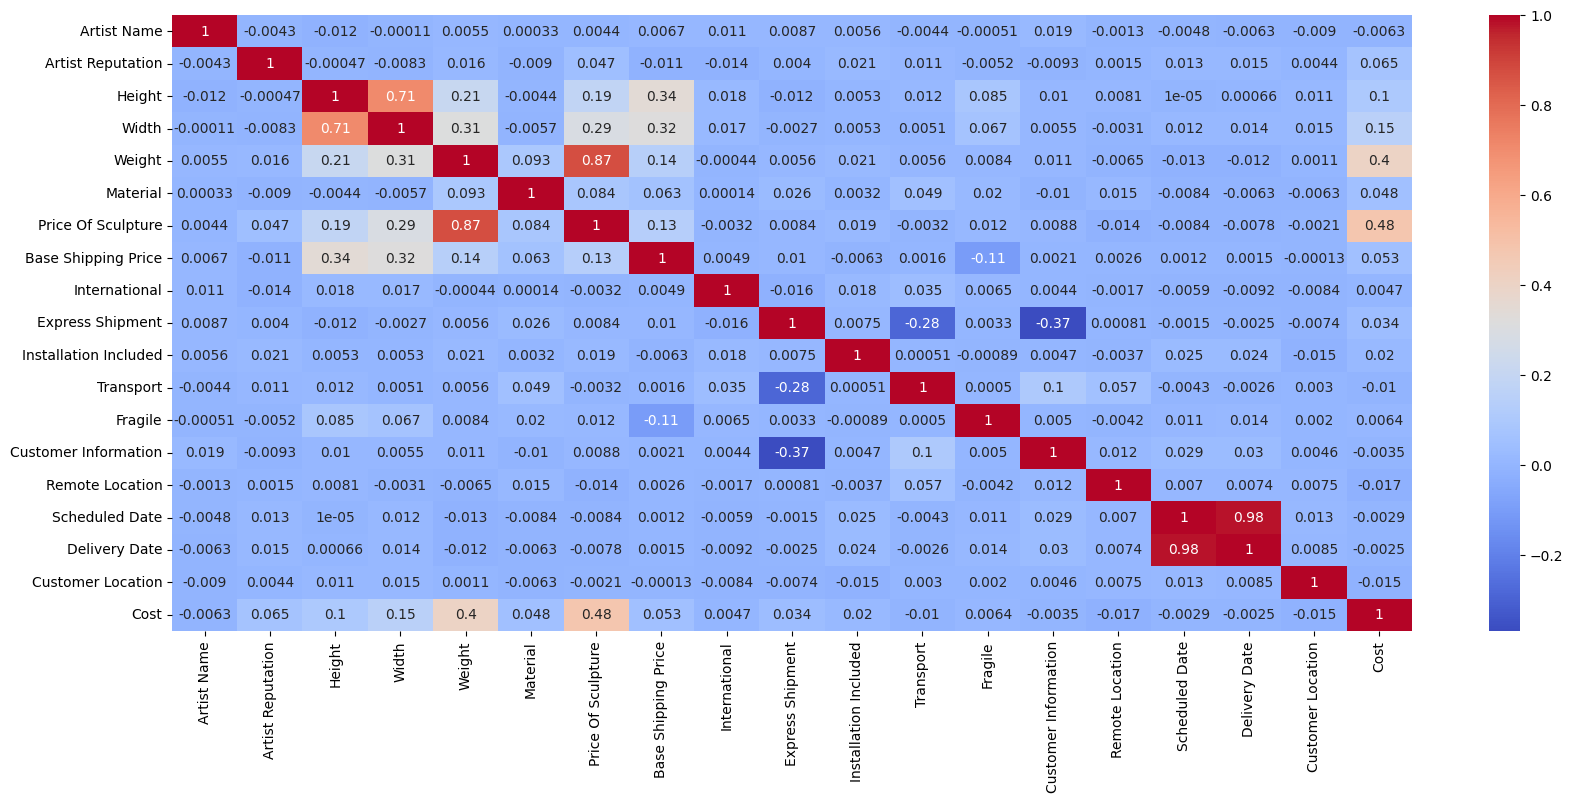

In [15]:
# prompt: fine correlation coefficient of features

corr = df_train.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


##**[2.4]** Wrapper Methods: Forward Feature Selection


In [16]:
# prompt: Forward Feature Selection on features and print the best subset

from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=10)
selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.get_support()]

# Print the best subset
print("Best subset of features:")
print(selected_features)
print('\n')
print("Original set of features:")
print(df_train.columns)


Best subset of features:
Index(['Height', 'Width', 'Weight', 'Price Of Sculpture', 'International',
       'Express Shipment', 'Transport', 'Customer Information',
       'Delivery Date', 'Cost'],
      dtype='object')


Original set of features:
Index(['Artist Name', 'Artist Reputation', 'Height', 'Width', 'Weight',
       'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')


##**[2.5]** Wrapper Methods: Recursive Feature Elimination

In [17]:
# prompt: Recursive Feature Elimination on features and print the best subset

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Create the RFE object and fit it to the data
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the best subset
print("Best subset of features:")
print(selected_features)
print('\n')
print("Original set of features:")
print(df_train.columns)


Best subset of features:
Index(['Artist Reputation', 'Height', 'Width', 'Material', 'International',
       'Express Shipment', 'Installation Included', 'Transport', 'Fragile',
       'Customer Information'],
      dtype='object')


Original set of features:
Index(['Artist Name', 'Artist Reputation', 'Height', 'Width', 'Weight',
       'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')


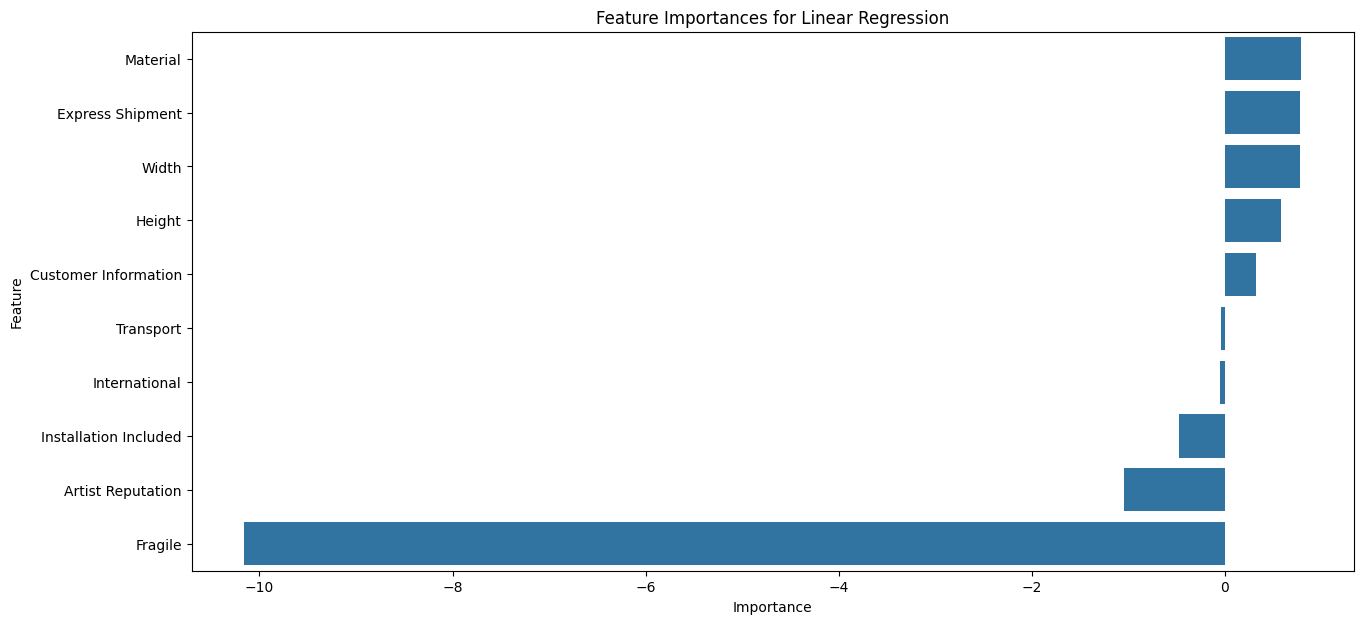

                 Feature  Importance
3               Material    0.789447
5       Express Shipment    0.779091
2                  Width    0.773622
1                 Height    0.577563
9   Customer Information    0.322872
7              Transport   -0.044132
4          International   -0.051198
6  Installation Included   -0.476158
0      Artist Reputation   -1.044537
8                Fragile  -10.156242


In [18]:
# Extract the coefficients from the LinearRegression model
coefs = rfe.estimator_.coef_

# Create a dataframe with the features and their corresponding coefficients
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': coefs})

# Sort the dataframe by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances for Linear Regression')
plt.show()

# Print the importance dataframe
print(importance_df)

In [31]:
from sklearn.linear_model import LassoCV

# Create a LassoCV model
lasso = LassoCV(cv=5, random_state=42)

# Fit the model
lasso.fit(X_train, y_train)

# Get the selected features
selected_features = np.where(lasso.coef_ != 0)

# Print the selected features set as a list
selected_features_list = df_train.columns[selected_features].tolist()
print("\nSelected features set as a list:")
print(selected_features_list)

print('\n')
print("Original set of features:")
print(df_train.columns)



Selected features set as a list:
['Weight']


Original set of features:
Index(['Artist Name', 'Artist Reputation', 'Height', 'Width', 'Weight',
       'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')
